In [2]:
import json
import numpy as np
import pandas as pd
import seaborn as sns

from scripts.analysis import normalize
from scripts.data_processing import process_trials_from_df

In [3]:
with open("./trial_setups/r0.json", "r") as read_file:
    r0 = json.load(read_file)
    r0 = pd.DataFrame.from_dict(r0)

with open("./trial_setups/r1.json", "r") as read_file:
    r1 = json.load(read_file)
    r1 = pd.DataFrame.from_dict(r1)
    
with open("./trial_setups/r2.json", "r") as read_file:
    r2 = json.load(read_file)
    r2 = pd.DataFrame.from_dict(r2)

with open("./trial_setups/r3.json", "r") as read_file:
    r3 = json.load(read_file)
    r3 = pd.DataFrame.from_dict(r3)
    
with open("./trial_setups/r4.json", "r") as read_file:
    r4 = json.load(read_file)
    r4 = pd.DataFrame.from_dict(r4)

with open("./trial_setups/r5.json", "r") as read_file:
    r5 = json.load(read_file)
    r5 = pd.DataFrame.from_dict(r5)
    
with open("./trial_setups/r6.json", "r") as read_file:
    r6 = json.load(read_file)
    r6 = pd.DataFrame.from_dict(r6)

with open("./trial_setups/r7.json", "r") as read_file:
    r7 = json.load(read_file)
    r7 = pd.DataFrame.from_dict(r7)

with open("./trial_setups/r8.json", "r") as read_file:
    r8 = json.load(read_file)
    r8 = pd.DataFrame.from_dict(r8)

with open("./trial_setups/r9.json", "r") as read_file:
    r9 = json.load(read_file)
    r9 = pd.DataFrame.from_dict(r9)

with open("./trial_setups/r10.json", "r") as read_file:
    r10 = json.load(read_file)
    r10 = pd.DataFrame.from_dict(r10)

with open("./trial_setups/r11.json", "r") as read_file:
    r11 = json.load(read_file)
    r11 = pd.DataFrame.from_dict(r11)

In [5]:
uuids = ratings.keys()

In [130]:
with open('diff_when_lied.json', 'r') as f:
    when_lied = json.load(f)
    
with open('diff_picked_col.json', 'r') as f:
    col_pick = json.load(f)
    
with open('diff_reported_col.json', 'r') as f:
    reported_col = json.load(f)
    
with open('diff_RT_honesty_rating.json', 'r') as f:
    RT_hr = json.load(f)

with open('diff_win_lose_tie.json', 'r') as f:
    winlose = json.load(f)

In [8]:
from scipy.stats import pearsonr, spearmanr, zscore, mannwhitneyu, wilcoxon

In [10]:
def get_trials_diff(uuid):
    if uuid in r012:
        trials = process_trials_from_df(pd.concat([r0, r1, r2]).reset_index(), 7)
    elif uuid in r345:
        trials = process_trials_from_df(pd.concat([r3, r4, r5]).reset_index(), 7)
    elif uuid in r678:
        trials = process_trials_from_df(pd.concat([r6, r7, r8]).reset_index(), 7)
    elif uuid in r91011:
        trials = process_trials_from_df(pd.concat([r9, r10, r11]).reset_index(), 7)
    else:
        print('no applicable subject condition found')
    return trials

In [11]:
r012 = ['599186630675b100014daddd', '6119884fd696463d717432c9']
r345 = ['61005d2e9b8bac27eba5b984', '610995bd91de0e899effd73d']
r678 = ['610bb05be2e705f3e47e87fb', '610824959b488e57fa8a4a33', '60f0937892bd49086d6e2a77', '5cf656e90acc8f000147f643']
r91011 = ['5fe292a28fd71dea34d04453', '5d341b57a48ae7000114152a']

In [134]:
agg_df = []

for i, uuid in enumerate(uuids):
    trials = get_trials_diff(uuid)
    trials['trial_cond'] = trials['n_red'] * trials['outcome']

    rating = [ratings[uuid][k] for k in ratings[uuid].keys()]
    
    df = pd.DataFrame({'n_red': trials['n_red'], 
                       't_cond': trials['trial_cond'], 
                       'outcome': trials['outcome'],
                       'signed_ev': trials['normed_signed_e_v'], 
                       'unsigned_ev': trials['normed_unsigned_e_v'], 
                       'n_consec_col': trials['n_consec_colour'],
                       'signed_n_col': trials['n_consec_colour'] * trials['outcome'],
                       'hr': rating, 
                       'lied': when_lied[uuid], 'reported_col': reported_col[uuid],
                       'picked_col': col_pick[uuid], 
                       'RT_hr': RT_hr[uuid],
                      'subject': i,
                       'win_lose_tie': winlose[uuid],
                      'nred_transition': trials['n_red'].diff().values,
                      'tcond_transition': trials['trial_cond'].diff().values})
    df['nred_transition'][0] = 0
    df['tcond_transition'][0] = 0
    agg_df.append(df)

<ipython-input-134-2ecfa971a7da>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nred_transition'][0] = 0
<ipython-input-134-2ecfa971a7da>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tcond_transition'][0] = 0
<ipython-input-134-2ecfa971a7da>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nred_transition'][0] = 0
<ipython-input-134-2ecfa971a7da>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [135]:
dfs = pd.concat(agg_df)

In [210]:
sns.set()
sns.set_style("whitegrid")

In [200]:
xticks = sorted(set(dfs['signed_ev'].apply(lambda x: round(x, 2))))

[Text(0.5, 0, "# red cards * other player's card colour"),
 Text(0, 0.5, 'suspicion rating')]

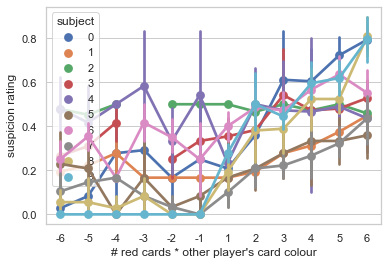

In [213]:
p = sns.pointplot(data=dfs, x="t_cond", y="hr", hue="subject")
p.set(xlabel="# red cards * other player's card colour", ylabel="suspicion rating")
# p.set_xticklabels(xticks)

C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


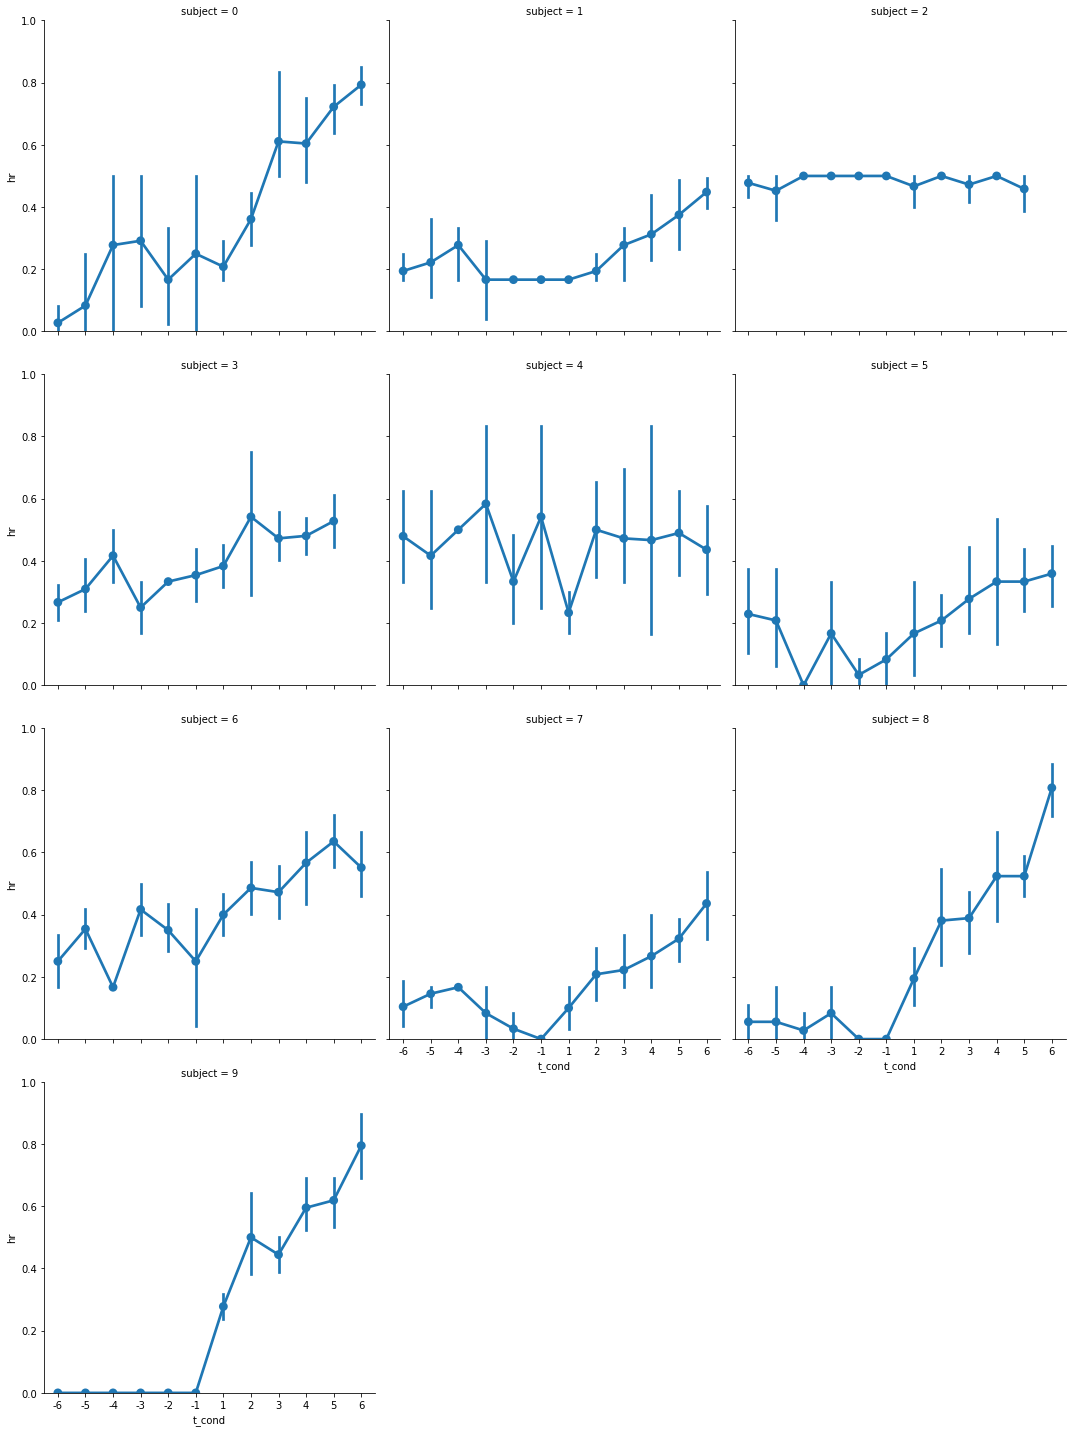

In [21]:
g = sns.FacetGrid(dfs, col="subject", col_wrap=3, height=5, ylim=(0, 1))
g.map(sns.pointplot, "t_cond", "hr")

In [140]:
col_dict = {-1: "r", 1: "b"}

C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


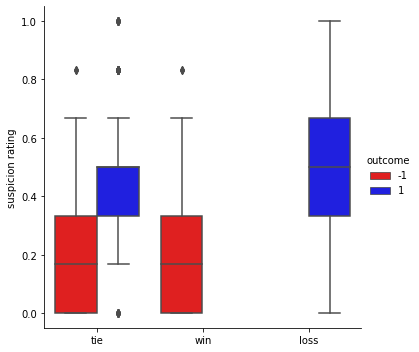

In [155]:
import matplotlib.pyplot as plt

col_dict = {-1: "r", 1: "b"}
p = sns.factorplot(x="win_lose_tie", hue="outcome", y="hr", data=dfs, kind="box", palette=col_dict)

p.set(xlabel="", ylabel="suspicion rating")

In [156]:
import statsmodels.api as sm

i_coef = []

for i, df in enumerate(agg_df):
    print("SUBJECT", i)
    df['subject'] = i
    df['const'] = 1
    model = sm.GLM(df['hr'], df[['const', 'signed_ev']])
    result = model.fit()
    print(result.summary())
    i_coef.append(result.params)

SUBJECT 0
                 Generalized Linear Model Regression Results                  
Dep. Variable:                     hr   No. Observations:                   90
Model:                            GLM   Df Residuals:                       88
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                        0.044287
Method:                          IRLS   Log-Likelihood:                 13.575
Date:                Mon, 20 Sep 2021   Deviance:                       3.8972
Time:                        20:24:59   Pearson chi2:                     3.90
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0174      0.051     -0.34

In [157]:
i_coef

[const       -0.017404
 signed_ev    0.764908
 dtype: float64,
 const        0.106511
 signed_ev    0.300901
 dtype: float64,
 const        0.480085
 signed_ev   -0.000670
 dtype: float64,
 const        0.184317
 signed_ev    0.330978
 dtype: float64,
 const        0.414284
 signed_ev    0.052703
 dtype: float64,
 const        0.051874
 signed_ev    0.301793
 dtype: float64,
 const        0.250043
 signed_ev    0.341393
 dtype: float64,
 const       -0.019159
 signed_ev    0.382151
 dtype: float64,
 const       -0.177470
 signed_ev    0.822904
 dtype: float64,
 const       -0.200416
 signed_ev    0.918566
 dtype: float64]

## check for transition effects

In [ ]:
#  [y-x for x, y in zip(trials['n_red'], trials['n_red'][1:])]

In [67]:
Counter(dfs['tcond_transition'])

Counter({0.0: 98,
         1.0: 64,
         -12.0: 10,
         12.0: 28,
         -2.0: 44,
         -1.0: 78,
         -10.0: 28,
         11.0: 16,
         2.0: 42,
         8.0: 40,
         -11.0: 34,
         9.0: 20,
         -3.0: 26,
         5.0: 22,
         -5.0: 24,
         -8.0: 40,
         -6.0: 18,
         -9.0: 20,
         4.0: 50,
         3.0: 46,
         -4.0: 66,
         7.0: 34,
         -7.0: 20,
         10.0: 20,
         6.0: 12})

In [59]:
Counter(dfs['nred_transition'])

Counter({0.0: 192,
         1.0: 126,
         -2.0: 70,
         -1.0: 106,
         4.0: 70,
         -3.0: 46,
         5.0: 26,
         -4.0: 96,
         2.0: 68,
         3.0: 74,
         -5.0: 26})

In [129]:
dfs

,n_red,t_cond,signed_ev,unsigned_ev,n_consec_col,signed_n_col,hr,lied,reported_col,picked_col,RT_hr,subject,nred_transition,tcond_transition
0,5,5,0.916667,0.857143,1,1,0.666667,0,1,1,6666,0,0.0,0.0
1,5,5,0.916667,0.857143,2,2,0.833333,0,1,1,5310,0,0.0,0.0
2,6,6,1.000000,1.000000,3,3,1.000000,1,1,-1,1918,0,1.0,1.0
3,6,6,1.000000,1.000000,4,4,1.000000,1,1,-1,2131,0,0.0,0.0
4,6,-6,0.416667,0.285714,1,-1,0.000000,1,1,-1,5223,0,0.0,-12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,5,5,0.916667,0.857143,11,11,0.666667,0,-1,-1,6144,9,4.0,4.0
86,1,1,0.583333,0.285714,12,12,0.333333,0,1,1,2820,9,-4.0,-4.0
87,4,4,0.833333,0.714286,13,13,0.666667,0,1,1,2534,9,3.0,3.0
88,2,-2,0.083333,0.857143,1,-1,0.000000,0,1,1,2003,9,-2.0,-6.0


[Text(0.5, 0, 'signed consecutive colours count'), Text(0, 0.5, 'suspicion')]

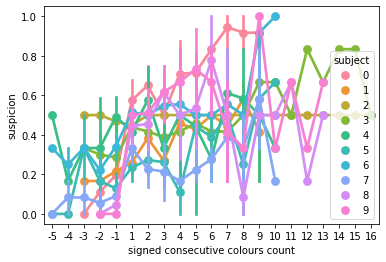

In [158]:
p = sns.pointplot(x="signed_n_col", y="hr", hue="subject", data=dfs)
p.set(xlabel="signed consecutive colours count", ylabel="suspicion")

C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


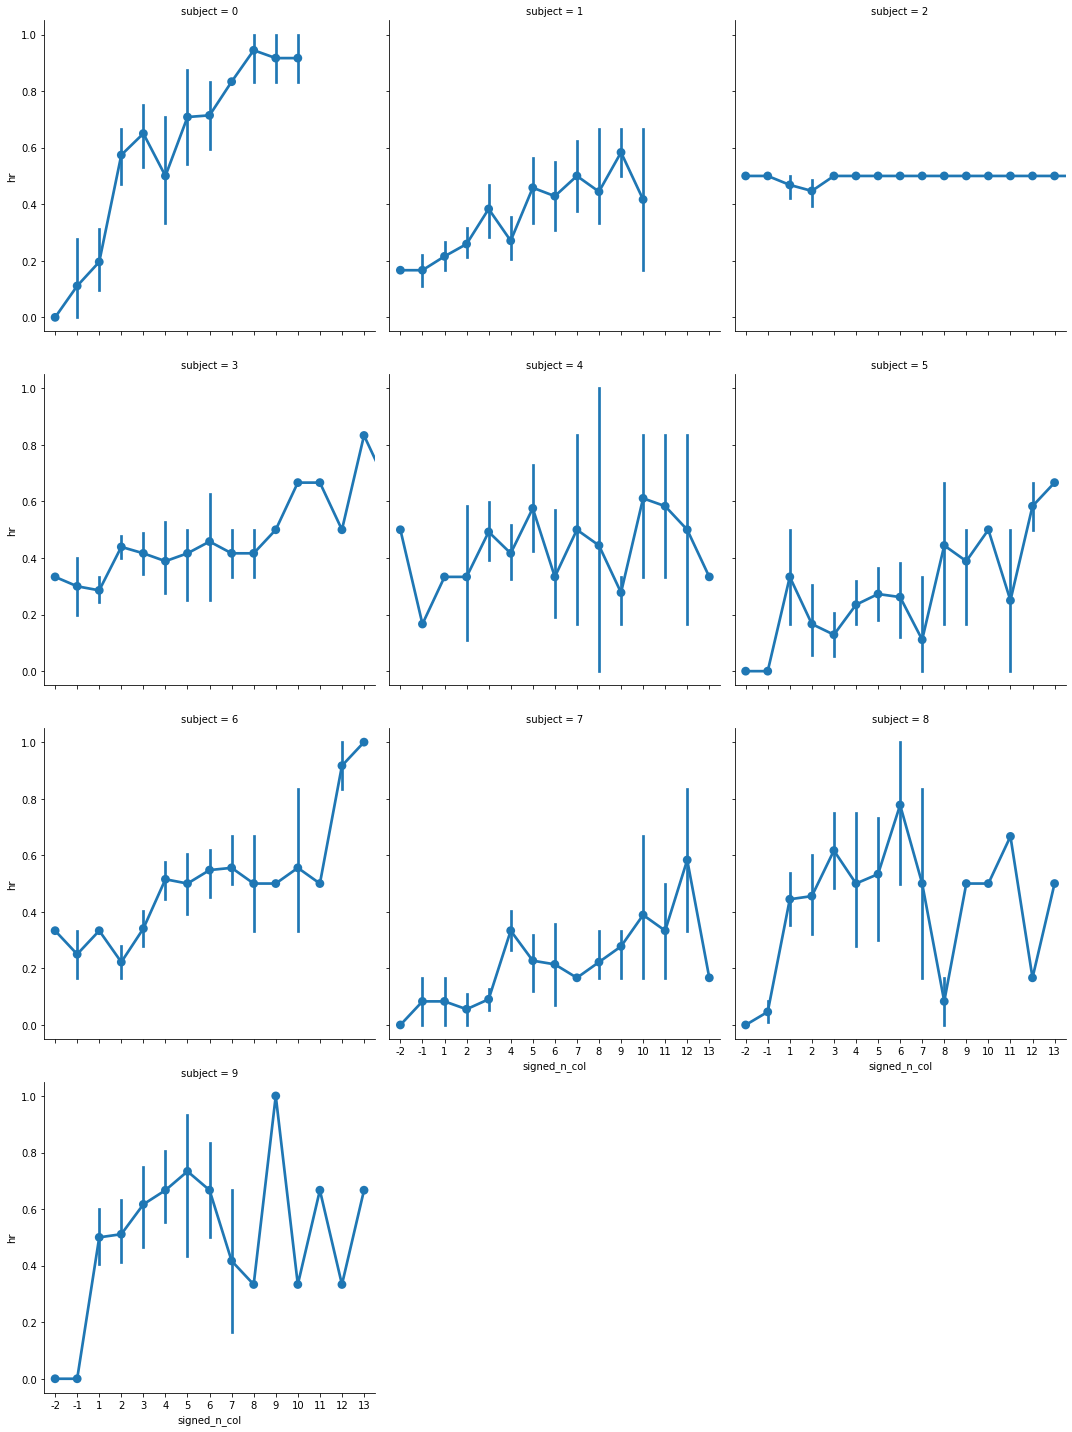

In [82]:
g = sns.FacetGrid(dfs, col="subject", col_wrap=3, height=5)
g.map(sns.pointplot, "signed_n_col", "hr")

<AxesSubplot:xlabel='n_consec_col', ylabel='hr'>

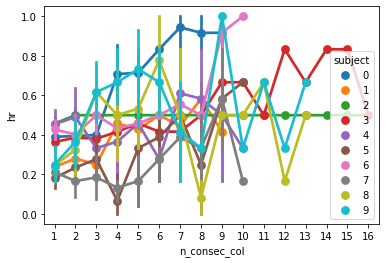

In [105]:
sns.pointplot(x="n_consec_col", y="hr", hue="subject", data=dfs)

C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


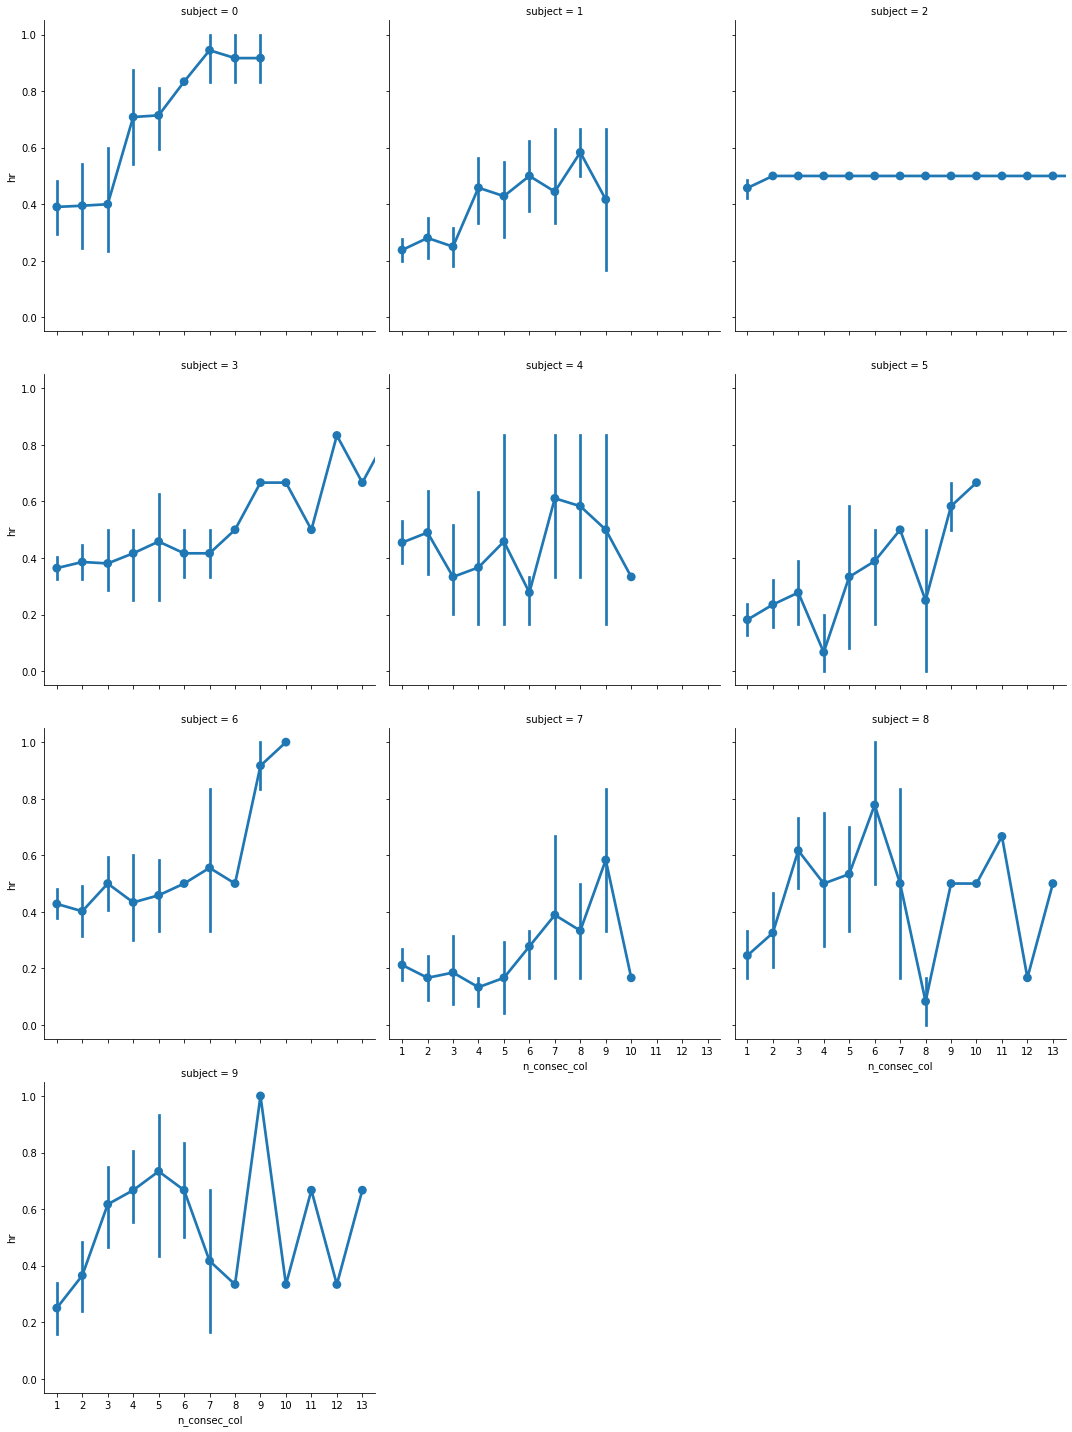

In [80]:
g = sns.FacetGrid(dfs, col="subject", col_wrap=3, height=5)
g.map(sns.pointplot, "n_consec_col", "hr")

[Text(0.5, 0, 'signed trial condition change'), Text(0, 0.5, 'suspicion')]

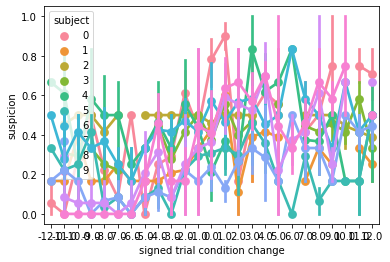

In [172]:
p = sns.pointplot(x="tcond_transition", y="hr", hue="subject", data=dfs)
p.set(xlabel="signed trial condition change", ylabel="suspicion")

C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


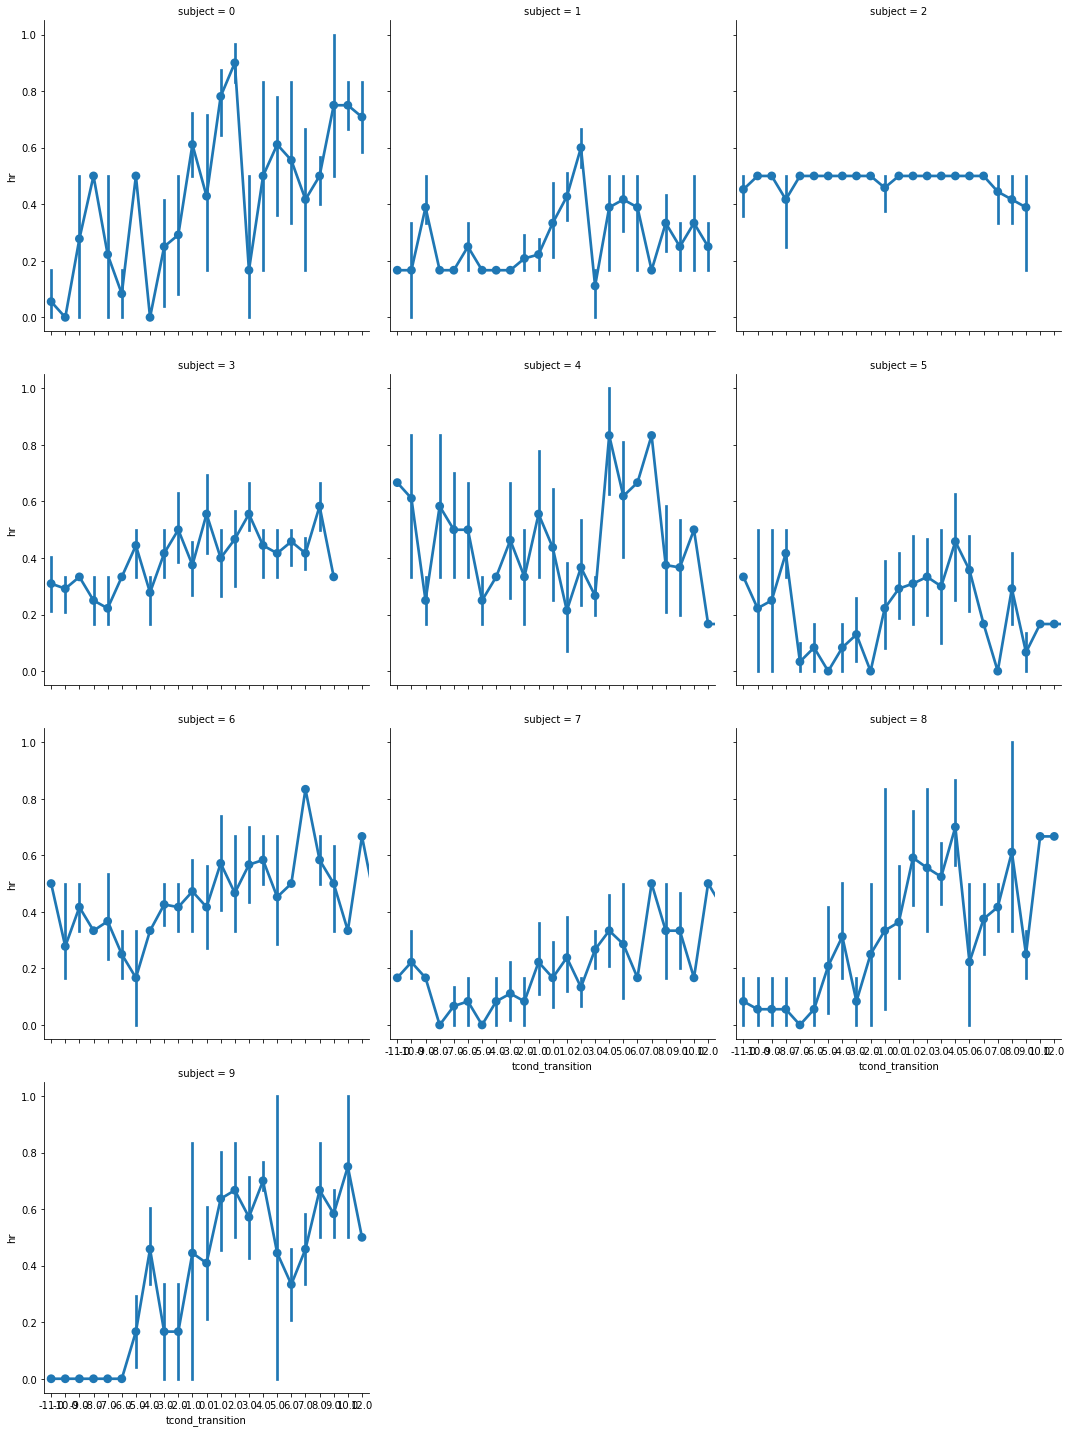

In [66]:
g = sns.FacetGrid(dfs, col="subject", col_wrap=3, height=5)
g.map(sns.pointplot, "tcond_transition", "hr")

<AxesSubplot:xlabel='nred_transition', ylabel='hr'>

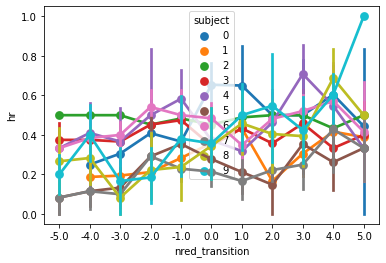

In [107]:
sns.pointplot(x="nred_transition", y="hr", hue="subject", data=dfs)

C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


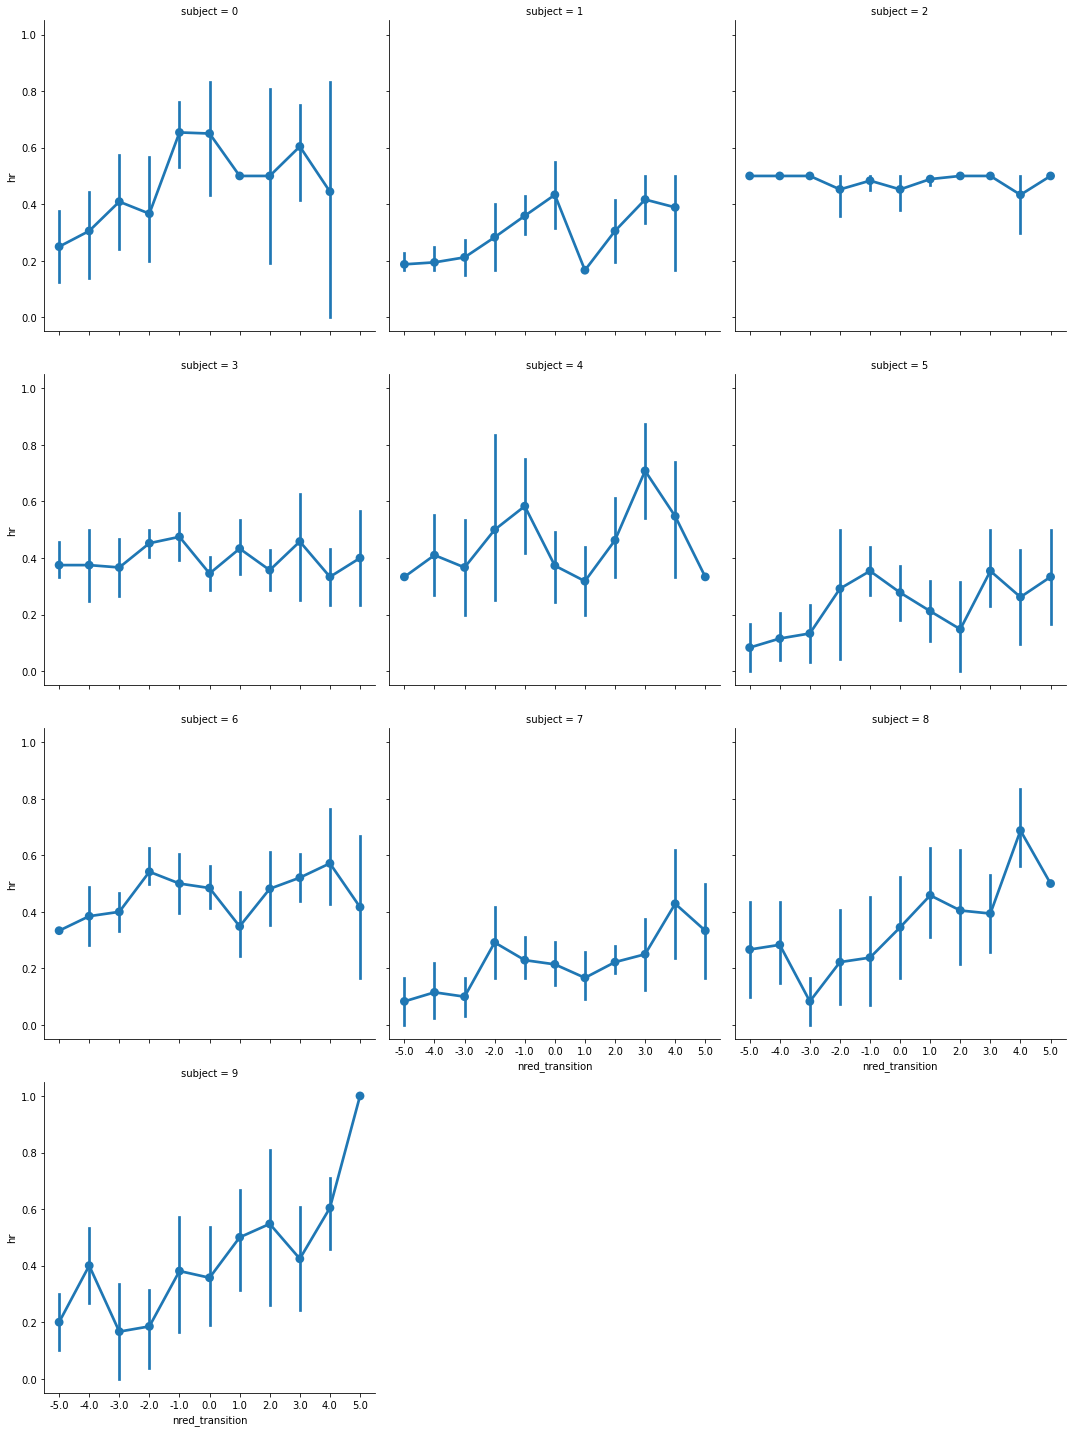

In [58]:
g = sns.FacetGrid(dfs, col="subject", col_wrap=3, height=5)
g.map(sns.pointplot, "nred_transition", "hr")

<AxesSubplot:xlabel='hr', ylabel='Count'>

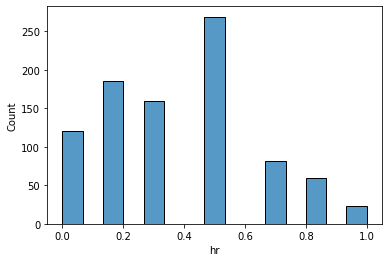

In [108]:
sns.histplot(data=dfs, x="hr")

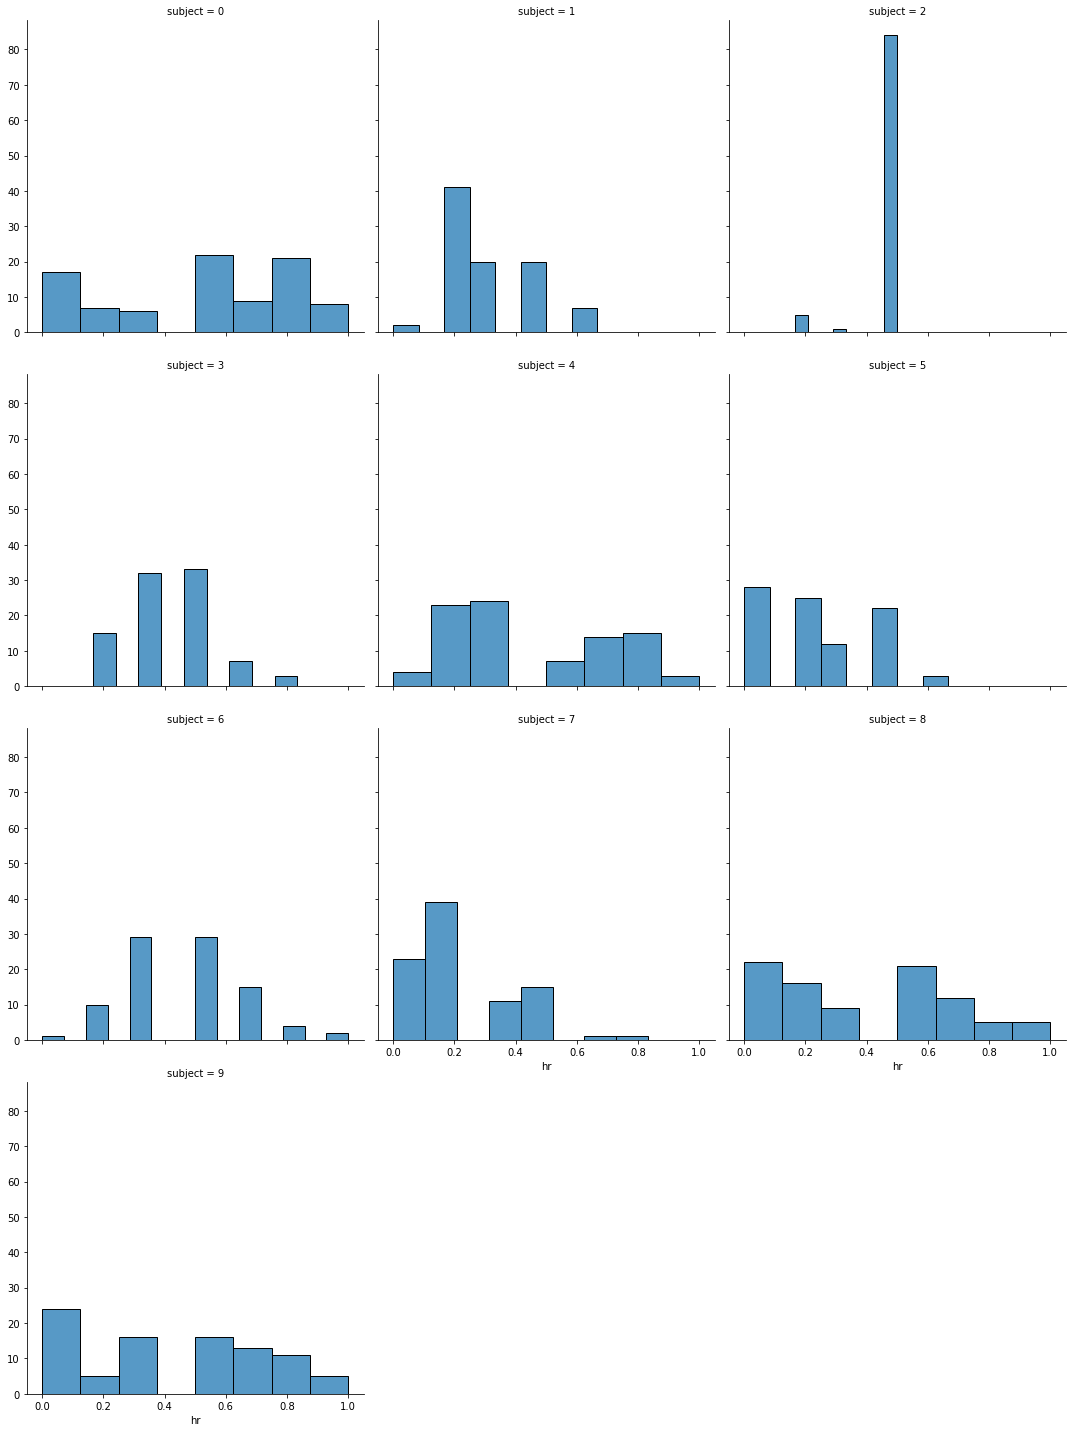

In [20]:
g = sns.FacetGrid(dfs, col="subject", col_wrap=3, height=5)
g.map(sns.histplot, "hr")

In [24]:
for i in range(len(uuids)):
    print(agg_df[i].pivot_table(columns=["t_cond", "lied"], values="hr"))

t_cond        -6        -5             -4         -3                  -2       \
lied           0    1    0    1         0     1    0         1         0    1   
hr      0.166667  0.0  0.1  0.0  0.333333  0.25  0.5  0.222222  0.111111  0.5   

t_cond  ...         1         2         3           4                   5  \
lied    ...         0         0         0    1      0         1         0   
hr      ...  0.208333  0.361111  0.666667  0.5  0.625  0.583333  0.733333   

t_cond                  6            
lied           1        0         1  
hr      0.714286  0.75641  0.822917  

[1 rows x 22 columns]
t_cond        -6        -5        -4        -3        -2        -1            \
lied           0         0         0         0         0         0         1   
hr      0.194444  0.222222  0.277778  0.166667  0.166667  0.166667  0.166667   

t_cond         1         2         3       4      5         6  
lied           0         0         0       0      0         0  
hr      0.166667  

In [25]:
tmp = agg_df[1].pivot_table(index=agg_df[1].index, columns="lied", values="RT_hr")

In [27]:
from collections import Counter

In [28]:
for i in range(len(uuids)):
#     print("subject", i)
    tmp = agg_df[i].pivot_table(index=agg_df[i].index, columns="lied", values="RT_hr")
    lie = tmp[[1]].to_numpy().flatten()
    no_lie = tmp[[0]].to_numpy().flatten()
    
    lie = [v for v in lie if not np.isnan(v)]
    no_lie = [v for v in no_lie if not np.isnan(v)]

#     print(tmp[[0]].mean(), tmp[[1]].mean())
    print(mannwhitneyu(lie, no_lie))
#     print(tmp[[0]].values)

MannwhitneyuResult(statistic=849.5, pvalue=0.10533435888773551)
MannwhitneyuResult(statistic=0.0, pvalue=0.04516113374509904)
MannwhitneyuResult(statistic=10.0, pvalue=0.09530915638175602)
MannwhitneyuResult(statistic=693.0, pvalue=0.3837148217726047)
MannwhitneyuResult(statistic=588.0, pvalue=0.19758447752898728)
MannwhitneyuResult(statistic=38.0, pvalue=0.019322529529977026)
MannwhitneyuResult(statistic=898.5, pvalue=0.2519616948997583)


KeyError: "None of [Int64Index([1], dtype='int64', name='lied')] are in the [columns]"

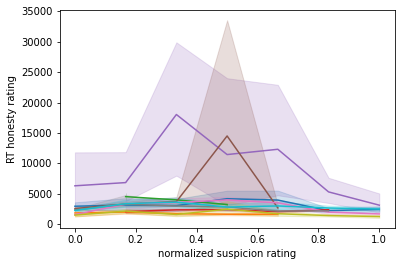

In [29]:
# plot RTs for various EV levels
for i in range(len(uuids)):
    p = sns.lineplot(data=agg_df[i], x='hr', y='RT_hr')
    p.set(xlabel="normalized suspicion rating", ylabel="RT honesty rating")

In [30]:
agg_df[9].groupby(['n_red', 'picked_col', 'reported_col']).size()

n_red  picked_col  reported_col
1      -1          -1               1
                    1               1
        1           1              13
2      -1          -1               4
                    1               1
        1           1               6
3      -1          -1               3
        1           1               5
4      -1          -1               7
                    1               1
        1           1               5
5      -1          -1              14
        1           1              10
6      -1          -1              12
                    1               1
        1           1               6
dtype: int64

In [31]:
for i in range(len(uuids)):
    print(spearmanr(agg_df[i]['hr'].diff()[1:-1], agg_df[1]['lied'][2:]))

SpearmanrResult(correlation=-0.09822887970472143, pvalue=0.3625601077211057)
SpearmanrResult(correlation=-0.16600580480997476, pvalue=0.12216431542581312)
SpearmanrResult(correlation=-0.011693752573324006, pvalue=0.9138907285024837)
SpearmanrResult(correlation=0.017314228195437067, pvalue=0.8727932524562915)
SpearmanrResult(correlation=-0.08286773589899886, pvalue=0.4427398508365017)
SpearmanrResult(correlation=-0.004314394907809744, pvalue=0.9681775537196711)
SpearmanrResult(correlation=0.05334559452996111, pvalue=0.6215727876431497)
SpearmanrResult(correlation=0.11264372669684847, pvalue=0.2960631955164258)
SpearmanrResult(correlation=0.15876335077907558, pvalue=0.13956160894424754)
SpearmanrResult(correlation=-0.01698078333531858, pvalue=0.8752231421725152)


In [32]:
for i in range(len(uuids)):
    print(i)
    print(agg_df[i].groupby('lied')['hr'].mean())

0
lied
0    0.459184
1    0.565041
Name: hr, dtype: float64
1
lied
0    0.314607
1    0.166667
Name: hr, dtype: float64
2
lied
0    0.479401
1    0.500000
Name: hr, dtype: float64
3
lied
0    0.400966
1    0.436508
Name: hr, dtype: float64
4
lied
0    0.434272
1    0.491228
Name: hr, dtype: float64
5
lied
0    0.226054
1    0.500000
Name: hr, dtype: float64
6
lied
0    0.462264
1    0.450450
Name: hr, dtype: float64
7
lied
0    0.212963
Name: hr, dtype: float64
8
lied
0    0.372659
1    0.166667
Name: hr, dtype: float64
9
lied
0    0.395349
1    0.750000
Name: hr, dtype: float64


In [34]:
from statistics import median

In [36]:
lie_prop = []
for uuid in uuids:
    lie_prop.append(sum(when_lied[uuid])/len(when_lied[uuid]))

In [39]:
hrs = []
for uuid in uuids:
    r = [ratings[uuid][k] for k in ratings[uuid].keys()]
    hrs.append(sum(r)/len(r))

In [85]:
glm_intercept = [v['const'] for v in i_coef]
glm_coef = [v['signed_ev'] for v in i_coef]

<AxesSubplot:>

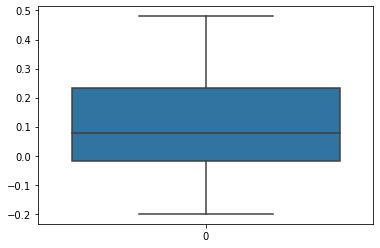

In [111]:
sns.boxplot(data=glm_intercept)

<AxesSubplot:>

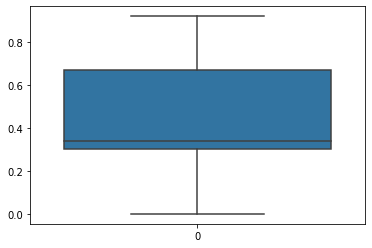

In [112]:
sns.boxplot(data=glm_coef)

In [95]:
coef_higher_than_median = [v > median(glm_coef) for v in glm_coef]

In [96]:
coef_higher_than_median

[True, False, False, False, False, False, True, True, True, True]

In [97]:
intercept_higher_than_median = [v > median(glm_intercept) for v in glm_intercept]

In [98]:
len(coef_higher_than_median)

10

In [164]:
s_ev_alpha = [
    0.74,
0.3,
0,
0.33,
0.05,
0.3,
0.34,
0.36,
0.6,
0.67
]

s_ev_prior = [
    0,
0.11,
0.48,
0.18,
0.42,
0.05,
0.25,
0,
0,
0]

In [165]:
# "higher_than_median": s_ev_alpha_hmedian, 
#                     "s_ev_alpha": s_ev_alpha, 
#                     "s_ev_prior": s_ev_prior, 
#                     "s_ev_prior_hmedian": s_ev_prior_hmedian, 

tmp = pd.DataFrame({"lie_prop": lie_prop,
                    "lied_more": [v > median(lie_prop) for v in lie_prop],
                    "higher_alpha": [v > median(s_ev_alpha) for v in s_ev_alpha],
                    "higher_prior": [v > median(s_ev_prior) for v in s_ev_prior],
                   "mean_normed_suspicion_rating": hrs,
                   "higher_coef": coef_higher_than_median,
                   "higher_intercept": intercept_higher_than_median})

Text(0.5, 1.0, 'DIFF condition: liars and mean suspicion')

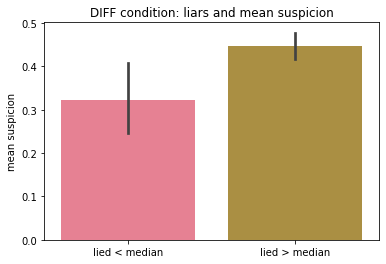

In [161]:
p = sns.barplot(data=tmp, x="lied_more", y="mean_normed_suspicion_rating")
p.set(xlabel="", ylabel="mean suspicion")
p.set_xticklabels(['lied < median', 'lied > median'])
p.set_title("DIFF condition: liars and mean suspicion")

Text(0.5, 1.0, 'DIFF signed EV sensitivity (alpha) and lie proportion')

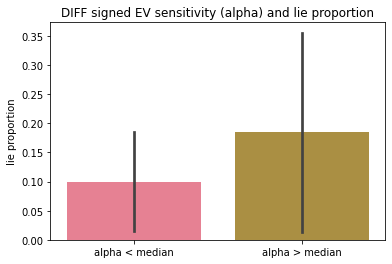

In [177]:
p = sns.barplot(data=tmp, x="higher_alpha", y="lie_prop")
p.set(xlabel="", ylabel="lie proportion")
p.set_xticklabels(['alpha < median', 'alpha > median'])
p.set_title("DIFF signed EV sensitivity (alpha) and lie proportion")

Text(0.5, 1.0, 'DIFF signed EV prior and lie proportion')

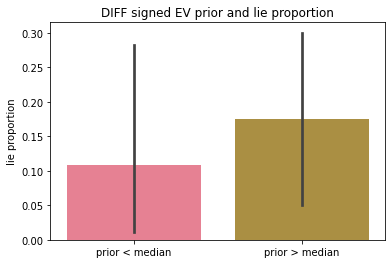

In [178]:
p = sns.barplot(data=tmp, x="higher_prior", y="lie_prop")
p.set(xlabel="", ylabel="lie proportion")
p.set_xticklabels(['prior < median', 'prior > median'])
p.set_title("DIFF signed EV prior and lie proportion")

In [117]:
tmp = dfs[['subject', 'signed_ev', 'hr']]

In [126]:
import statsmodels.formula.api as smf

In [127]:
md = smf.mixedlm("hr ~ signed_ev", tmp, groups=tmp["subject"], re_formula="~signed_ev")
mdf = md.fit(method=["lbfgs"])
print(mdf.summary())

             Mixed Linear Model Regression Results
Model:               MixedLM    Dependent Variable:    hr      
No. Observations:    900        Method:                REML    
No. Groups:          10         Scale:                 0.0303  
Min. group size:     90         Log-Likelihood:        260.4427
Max. group size:     90         Converged:             Yes     
Mean group size:     90.0                                      
---------------------------------------------------------------
                      Coef.  Std.Err.   z   P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept              0.107    0.072 1.481 0.139 -0.035  0.248
signed_ev              0.422    0.099 4.263 0.000  0.228  0.617
Group Var              0.050    0.142                          
Group x signed_ev Cov -0.063    0.187                          
signed_ev Var          0.095    0.268                          



In [121]:
# tmp.reset_index().to_feather('diff_long_ev_normed_hr.feather')

In [173]:
dfs['outcome_same_as_pick'] = dfs['outcome'] == dfs['picked_col']

Text(0.5, 1.0, "Suspicion when other player's reported colour was the same as the subject's random card pick or not")

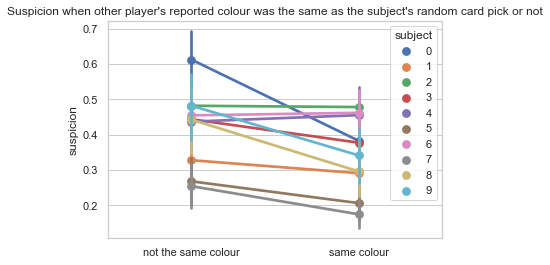

In [214]:
p = sns.pointplot(data=dfs, x="outcome_same_as_pick", y="hr", hue="subject")
p.set(xlabel="", ylabel="suspicion")
p.set_xticklabels(["not the same colour", "same colour"])
p.set_title("Suspicion when other player's reported colour was the same as the subject's random card pick or not")

In [225]:
from scipy.stats import mannwhitneyu

mannwhitneyu(dfs[dfs['outcome_same_as_pick'] == 1]['hr'], dfs[dfs['outcome_same_as_pick'] == 0]['hr'])

MannwhitneyuResult(statistic=83725.5, pvalue=2.387817944973554e-06)

Text(0.5, 1.0, 'Suspicion when subjects lied vs when they did not')

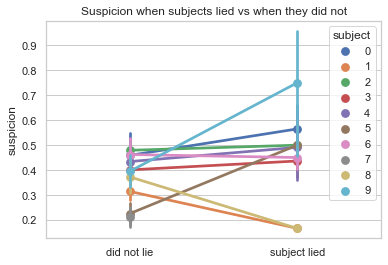

In [226]:
p = sns.pointplot(data=dfs, x="lied", y="hr", hue="subject")
p.set(xlabel="", ylabel="suspicion")
p.set_xticklabels(["did not lie", "subject lied"])
p.set_title("Suspicion when subjects lied vs when they did not")

In [227]:
mannwhitneyu(dfs[dfs['lied'] == 1]['hr'], dfs[dfs['lied'] == 0]['hr'])

MannwhitneyuResult(statistic=35493.0, pvalue=8.647202017682877e-08)

In [228]:
from scipy.stats import ttest_ind

ttest_ind(dfs[dfs['lied'] == 1]['hr'], dfs[dfs['lied'] == 0]['hr'])

Ttest_indResult(statistic=5.531294087097414, pvalue=4.169728676435536e-08)

In [229]:
median(lie_prop)

0.03888888888888889

In [243]:
lie_prop

[0.45555555555555555,
 0.011111111111111112,
 0.011111111111111112,
 0.23333333333333334,
 0.2111111111111111,
 0.03333333333333333,
 0.4111111111111111,
 0.0,
 0.011111111111111112,
 0.044444444444444446]